<a href="https://colab.research.google.com/github/Tonniah/TW/blob/main/KADP_Climate_Forecasting_Predicting_Temperature_Trends_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load and Inspect the Dataset**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('24.csv')

# Display general information about the dataset
print(data.info())

# Display statistical summary
print(data.describe())

# Preview the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  562 non-null    object 
 1   Latitude              562 non-null    float64
 2   Longitude             562 non-null    float64
 3   Temperature Min (°C)  562 non-null    float64
 4   Temperature Max (°C)  562 non-null    float64
 5   Humidity (%)          562 non-null    float64
 6   Wind Speed (m/s)      562 non-null    float64
 7   Solar DHI (W/m²)      562 non-null    float64
dtypes: float64(7), object(1)
memory usage: 35.2+ KB
None
         Latitude   Longitude  Temperature Min (°C)  Temperature Max (°C)  \
count  562.000000  562.000000            562.000000            562.000000   
mean    -0.816039   36.226290             16.405801             26.515819   
std      1.740280    2.145478              3.363217              2.374007   
min     -3.936345   

**Step 2: Date Parsing and Monthly Aggregation**

 focus on extracting monthly trends from the data. Climate data often contains daily measurements, but to analyze and predict trends, we need to aggregate it by month.

 group the data by Year-Month and calculate the average (mean) for each month.

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a 'Year-Month' column for monthly aggregation
data['Year-Month'] = data['Date'].dt.to_period('M')

# Preview the dataset with the 'Year-Month' column
print(data.head())


                       Date  Latitude  Longitude  Temperature Min (°C)  \
0 2024-06-10 00:00:00+00:00 -3.936345  39.743324                 24.19   
1 2024-06-11 00:00:00+00:00 -3.936345  39.743324                 23.75   
2 2024-05-06 00:00:00+00:00 -3.806814  39.630628                 23.19   
3 2024-05-07 00:00:00+00:00 -3.806814  39.630628                 23.31   
4 2024-05-10 00:00:00+00:00 -3.814632  39.622662                 23.19   

   Temperature Max (°C)  Humidity (%)  Wind Speed (m/s)  Solar DHI (W/m²)  \
0                 27.19          96.0             10.31            513.88   
1                 27.19          87.0              9.63            453.25   
2                 28.50         100.0              6.06            529.63   
3                 28.44         100.0              7.31            504.81   
4                 29.19         100.0              7.56            461.69   

  Year-Month  
0    2024-06  
1    2024-06  
2    2024-05  
3    2024-05  
4    2024-05  


<ipython-input-2-391fbdb43f96>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Year-Month'] = data['Date'].dt.to_period('M')


**Step 3: Aggregate Data by Month**

 group the data by Year-Month and calculate the average for each numeric climate variable (temperature, humidity, wind speed, etc.). This will give a dataset with one row per month.

In [ ]:
# Group by 'Year-Month' and calculate monthly averages
monthly_data = data.groupby('Year-Month').mean(numeric_only=True).reset_index()

# Display the aggregated monthly data
print(monthly_data.head())


  Year-Month  Latitude  Longitude  Temperature Min (°C)  Temperature Max (°C)  \
0    2023-09 -3.794052  39.625945             21.715000             28.440000   
1    2024-02 -3.824129  39.634349             24.407500             32.267500   
2    2024-03 -2.672743  38.744104             20.313333             30.168333   
3    2024-04 -2.553922  38.630495             21.051875             29.508125   
4    2024-05 -1.376491  37.610884             17.846375             25.665750   

   Humidity (%)  Wind Speed (m/s)  Solar DHI (W/m²)  
0       99.4150           7.32000          456.1100  
1       96.7500           7.22000          405.1600  
2       95.0000           7.03500          368.2200  
3       98.8750           6.08250          417.0500  
4       99.9125           6.31325          461.2045  


**Step 4: Exploratory Data Analysis (EDA)**

EDA helps identify key patterns and trends in the data (e.g., seasonal variations, rising temperatures).

It also helps spot any outliers or unusual trends that may need further investigation.

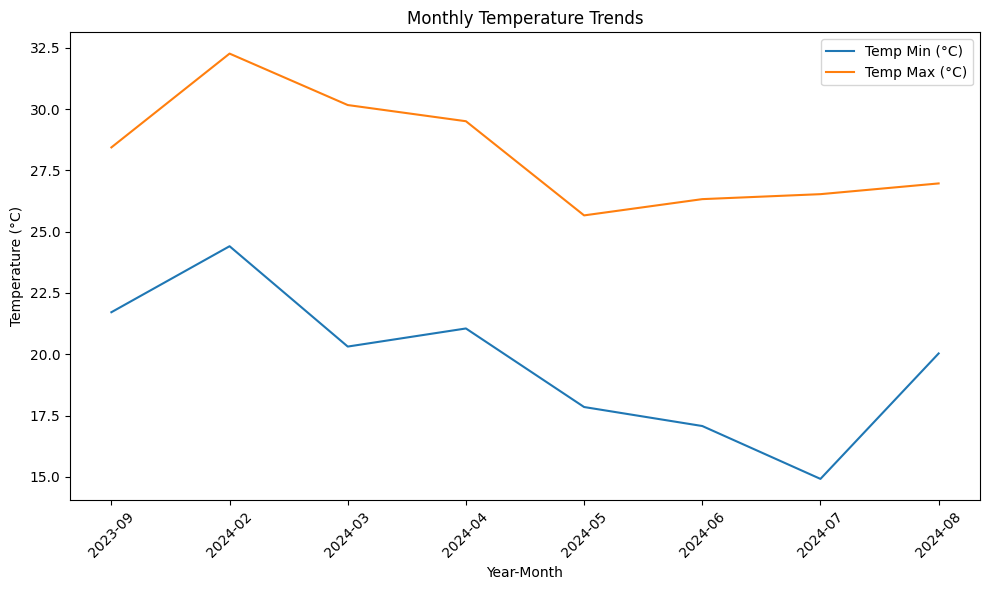

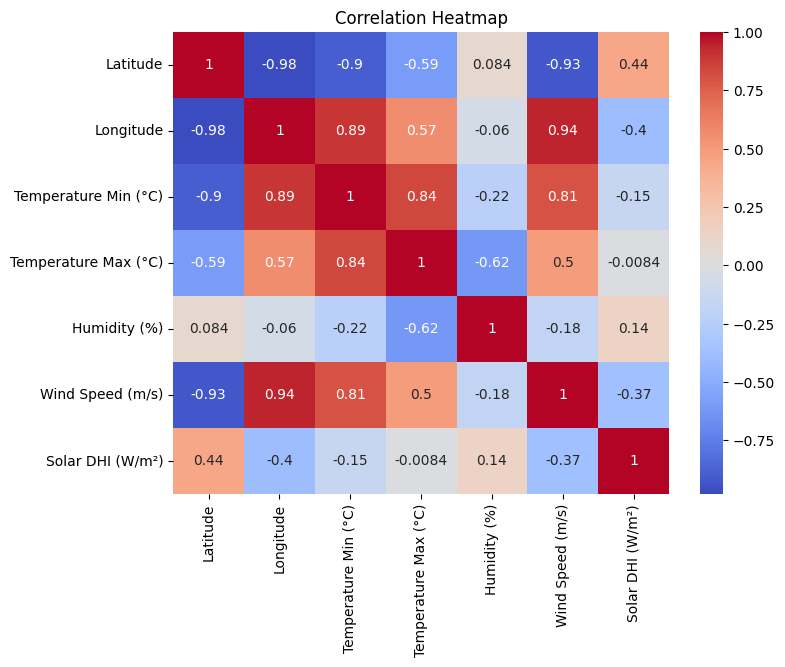

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year-Month' to string before plotting
monthly_data['Year-Month'] = monthly_data['Year-Month'].astype(str)

# Plot monthly trends for key variables
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data, x='Year-Month', y='Temperature Min (°C)', label='Temp Min (°C)')
sns.lineplot(data=monthly_data, x='Year-Month', y='Temperature Max (°C)', label='Temp Max (°C)')
plt.title('Monthly Temperature Trends')
plt.xlabel('Year-Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap to visualize relationships between variables
# Exclude 'Year-Month' from correlation calculation
correlation = monthly_data.drop(columns=['Year-Month']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Step 5: Predictive Modeling**

The final step is to build a predictive model to forecast future climate trends based on past data.I used Linear Regression to predict a variable like Temperature Min (°C).

Mean Squared Error: 7.150539590215656


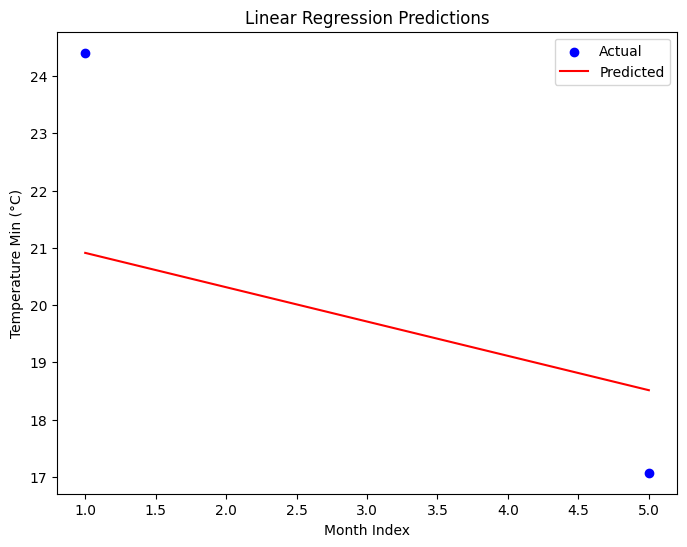

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data for modeling
X = monthly_data.index.values.reshape(-1, 1)  # Use the index (month) as the predictor variable
y = monthly_data['Temperature Min (°C)']     # Use Temperature Min as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.title('Linear Regression Predictions')
plt.xlabel('Month Index')
plt.ylabel('Temperature Min (°C)')
plt.legend()
plt.show()


**Summary of the Project**

**Goal:** Predict Temperature Min (°C) using historical monthly climate data.

**Data Loading and Preprocessing:**

I loaded the dataset and added a Year-Month column to group the data by month.

**Exploratory Data Analysis (EDA)**:

We visualized key climate variables (temperature, humidity, etc.) to understand the trends and patterns over time.
Predictive Modeling:

**Using Linear Regression**, I built a model to predict future Temperature Min based on historical data.
Model Evaluation:

We evaluated the model's accuracy using Mean Squared Error (MSE) and visualized predictions vs. actual data.

**What We Predicted:**
We focused on predicting the Minimum Temperature (°C) over time. This is a critical climate variable as it helps us understand daily temperature extremes and can be linked to broader climate change trends.